# Definición del problema

## Aprobación de crédito bancario

Este conjunto de datos “Aprobación de crédito” del repositorio UCI (http://archive.ics.uci.edu/ml/datasets/credit+approval), se puede utilizar para predecir si una solicitud de crédito a un banco va a ser aprobada o denegada

Los bancos reciben muchas solicitudes para tarjetas de crédito. Muchas de esas solicitudes son denegadas por diferentes razones. 

Analizar manualmente cada aplicación puede ser una tarea que consume mucho tiempo, así que automatizar esta tarea otorgaría ganancias de tiempo y dinero a los bancos.

### Información dataset

- A1: b, a. 
- A2: continuous. 
- A3: continuous. 
- A4: u, y, l, t. 
- A5: g, p, gg. 
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
- A7: v, h, bb, j, n, z, dd, ff, o. 
- A8: continuous. 
- A9: t, f. 
- A10: t, f. 
- A11: continuous. 
- A12: t, f. 
- A13: g, p, s. 
- A14: continuous. 
- A15: continuous. 
- A16: +,- (class attribute)

Este archivo se refiere a las solicitudes de tarjetas de crédito. Todos los nombres de atributos y valores se han cambiado a símbolos sin sentido para proteger la confidencialidad de los datos.

Este conjunto de datos es interesante porque hay una buena combinación de atributos: continuo, nominal con un pequeño número de valores y nominal con un mayor número de valores. También hay algunos valores que faltan.

**Fuente:**

(fuente confidencial)

Enviado por quinlan@cs.su.oz.au

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
# Definir el seed para la reproducibilidad de numeros aleatorios
SEED = 42
np.random.seed(SEED)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

# Preparación de datos

## Cargar datos

In [3]:
df = pd.read_csv('data.csv')
df.columns = ('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 
              'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'Y')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+


## Analisis de datos

### Estadística descriptiva

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
X1     689 non-null object
X2     689 non-null object
X3     689 non-null float64
X4     689 non-null object
X5     689 non-null object
X6     689 non-null object
X7     689 non-null object
X8     689 non-null float64
X9     689 non-null object
X10    689 non-null object
X11    689 non-null int64
X12    689 non-null object
X13    689 non-null object
X14    689 non-null object
X15    689 non-null int64
Y      689 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


Al mirar la información general del dataframe obtenemos:

- 689 observaciones
- 16 atributos
- 3 tipos de datos float64, int64 y object
- no hay datos nulos en ningun atributo

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+


In [6]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
684,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,00280,750,-
688,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,00000,0,-


In [7]:
df.describe()

,X3,X8,X11,X15
count,689.000,689.000,689.000,689.000
mean,4.766,2.225,2.402,1018.862
std,4.978,3.349,4.866,5213.743
min,0.000,0.000,0.000,0.000
25%,1.000,0.165,0.000,0.000
50%,2.750,1.000,0.000,5.000
75%,7.250,2.625,3.000,396.000
max,28.000,28.500,67.000,100000.000


In [8]:
import missingno as msno

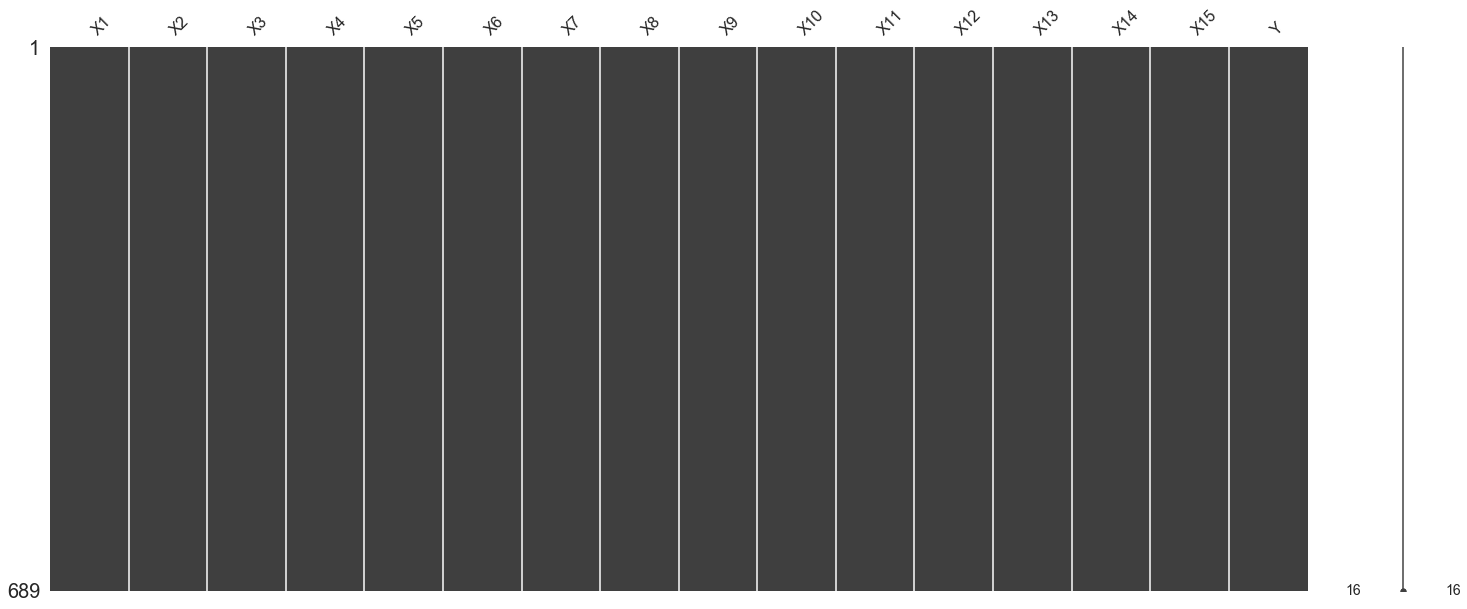

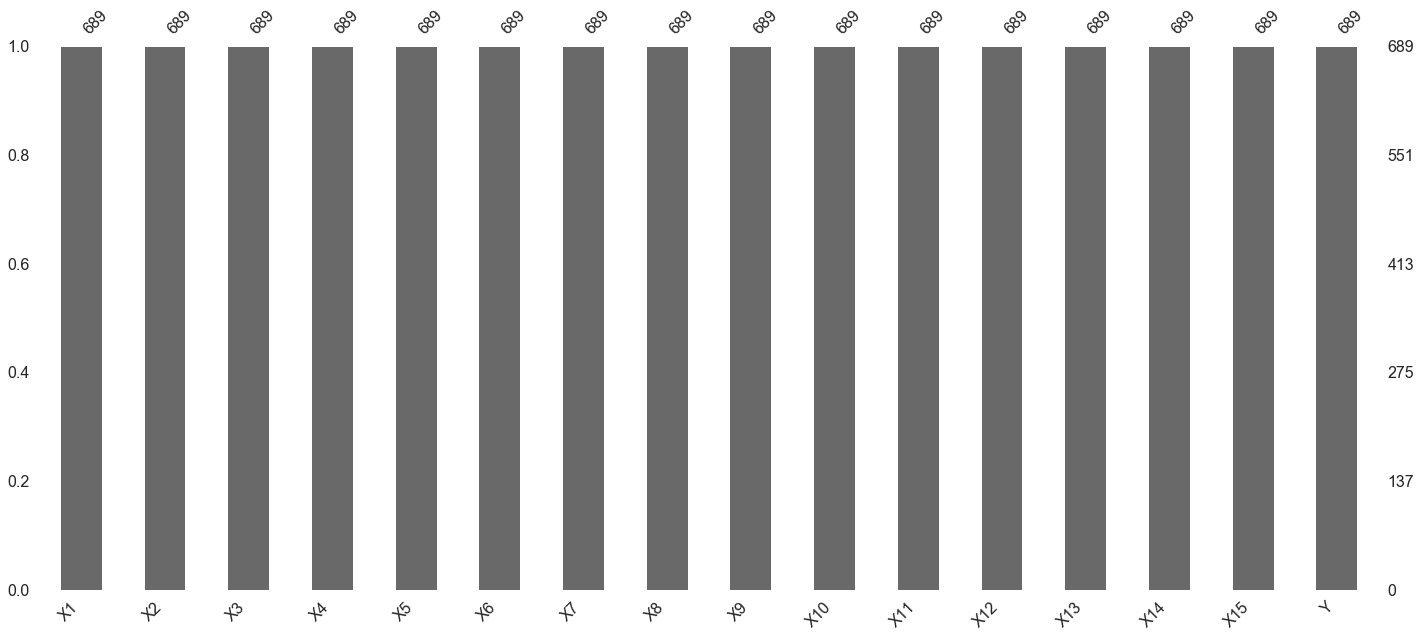

In [9]:
msno.matrix(df)
msno.bar(df)

In [10]:
df['X1'].value_counts(dropna=False).head()

b    467
a    210
?     12
Name: X1, dtype: int64

In [11]:
df['X2'].value_counts(dropna=False).head()

?        12
22.67     9
20.42     7
25.00     6
19.17     6
Name: X2, dtype: int64

In [12]:
df['X3'].value_counts(dropna=False).head()

1.500    21
2.500    19
3.000    19
0.000    18
0.750    16
Name: X3, dtype: int64

In [13]:
df['X4'].value_counts(dropna=False).head()

u    518
y    163
?      6
l      2
Name: X4, dtype: int64

In [14]:
df['X5'].value_counts(dropna=False).head()

g     518
p     163
?       6
gg      2
Name: X5, dtype: int64

Al obtener la información general del dataframe obteniamos que no existian datos nulos, pero al analizar los datos unicos de los primeros 5 atributos obtenemos que los datos nulos estan indicados con el simbolo de interrogación.

# Limpieza de datos

Antes de reemplazar los signos de interrogación por valores
que sean detectados como valores nulos

In [15]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
Y      0
dtype: int64

In [16]:
df = df.replace('?', np.nan)
df.isnull().sum()

X1     12
X2     12
X3      0
X4      6
X5      6
X6      9
X7      9
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14    13
X15     0
Y       0
dtype: int64

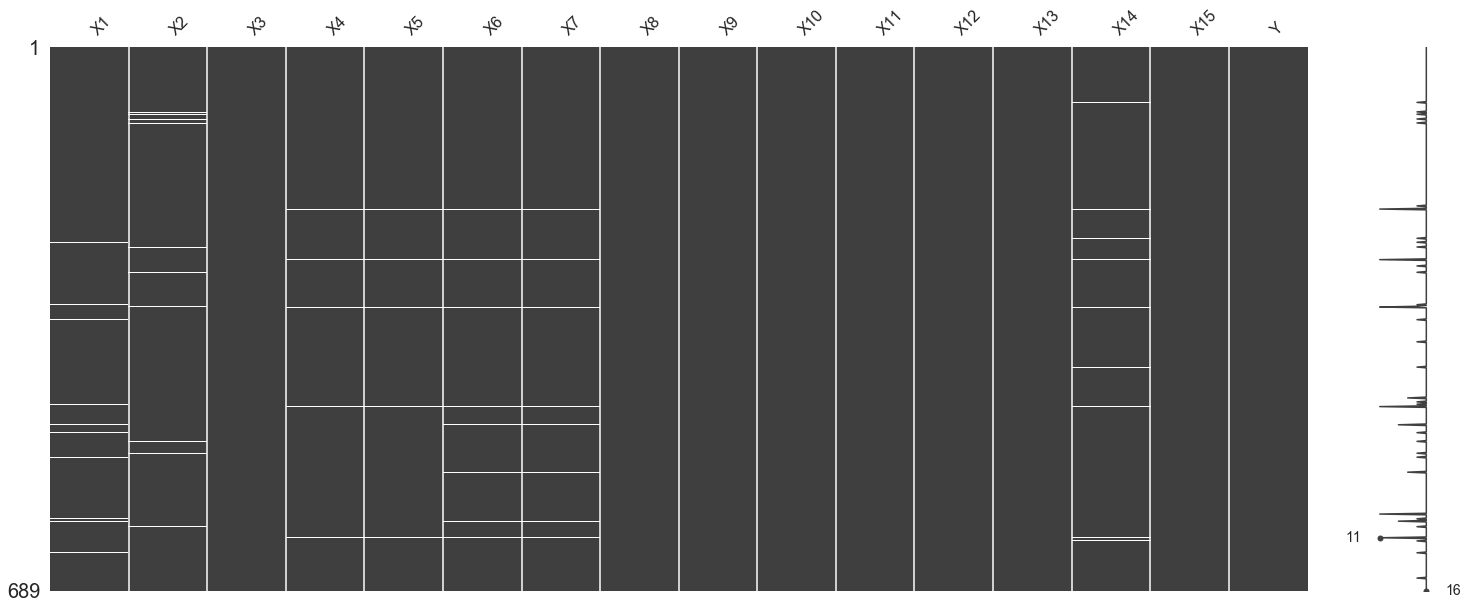

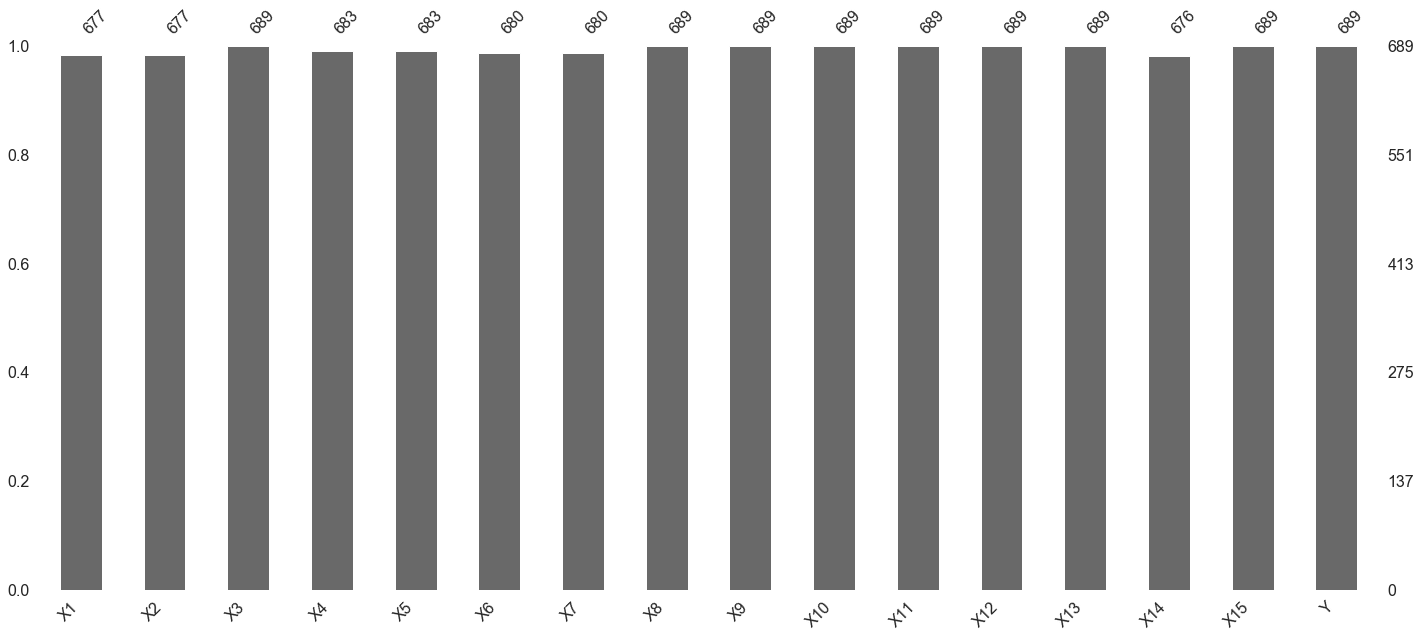

In [17]:
msno.matrix(df)
msno.bar(df)

Al obtener la información general del dataframe ya detectamos que hay datos nulos

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
X1     677 non-null object
X2     677 non-null object
X3     689 non-null float64
X4     683 non-null object
X5     683 non-null object
X6     680 non-null object
X7     680 non-null object
X8     689 non-null float64
X9     689 non-null object
X10    689 non-null object
X11    689 non-null int64
X12    689 non-null object
X13    689 non-null object
X14    676 non-null object
X15    689 non-null int64
Y      689 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


### Manejar datos faltantes

Se hara uso del método de Imputation dado que no se recomienda eliminar ninguna fila que contenga un dato faltante ya que puede influir en el resultado del modelo.
Se calcula la media para valores numericos y se calcula el valor mas frecuente para atributos con valors no numericos.


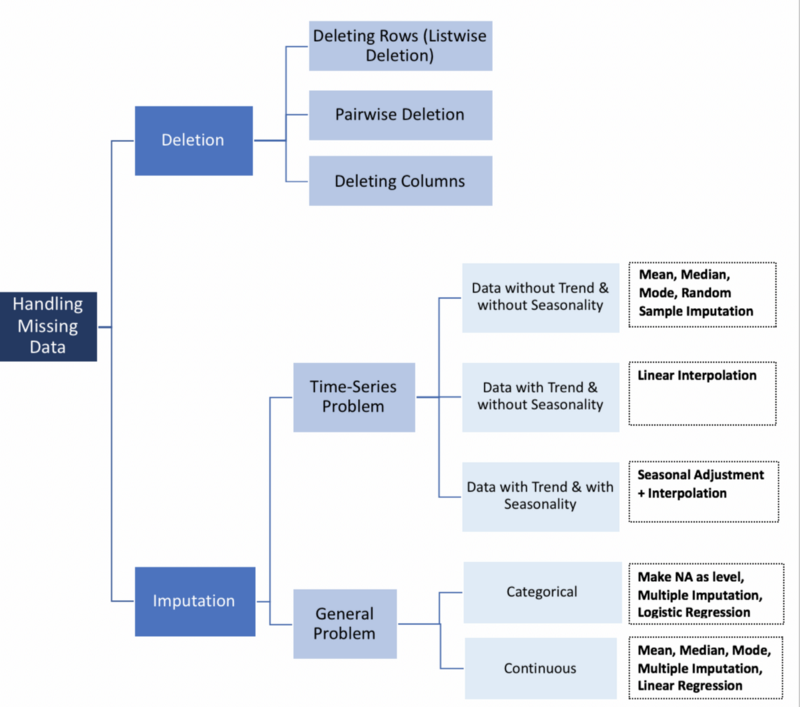

In [19]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Imputar datos faltantes.
        
        Columnas de tipo objeto son imputados con el valor mas frecuente en la columna
        
        Columnas de otro tipo son imputados con la media de la columna

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
df = DataFrameImputer().fit_transform(df)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
X1     689 non-null object
X2     689 non-null object
X3     689 non-null float64
X4     689 non-null object
X5     689 non-null object
X6     689 non-null object
X7     689 non-null object
X8     689 non-null float64
X9     689 non-null object
X10    689 non-null object
X11    689 non-null int64
X12    689 non-null object
X13    689 non-null object
X14    689 non-null object
X15    689 non-null int64
Y      689 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


# Outliers investigation

In [21]:
continous_columns = [column for column in df.columns if df[column].dtype != "object"]
continous_columns

['X3', 'X8', 'X11', 'X15']

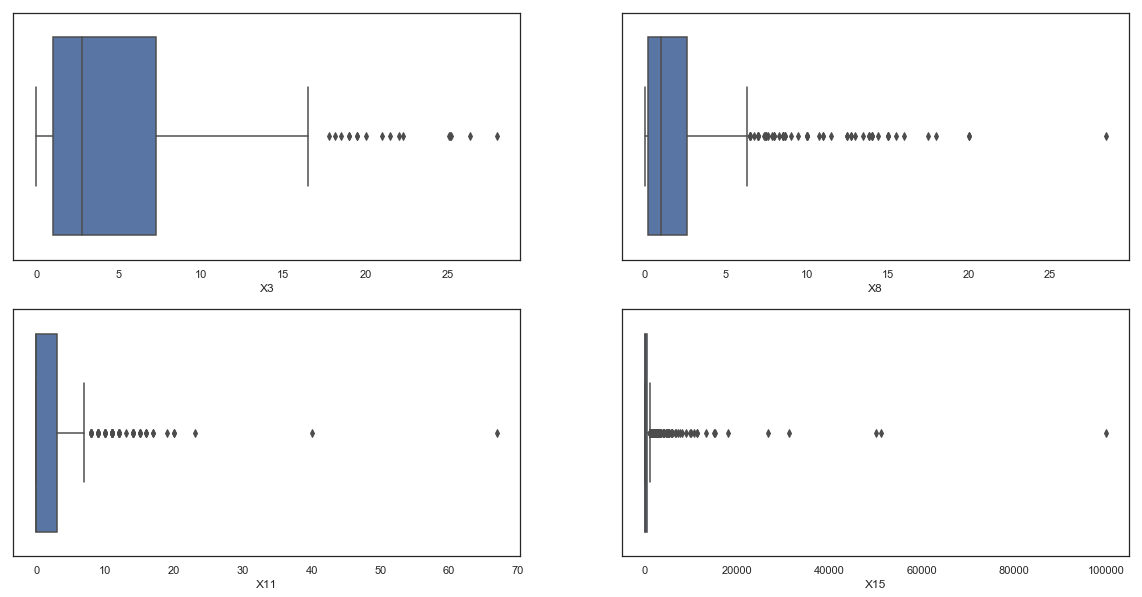

In [22]:
f,ax=plt.subplots(2,2,figsize=(20,10))

sns.boxplot(x=df['X3'], ax=ax[0][0])
sns.boxplot(x=df['X8'], ax=ax[0][1])
sns.boxplot(x=df['X11'], ax=ax[1][0])
sns.boxplot(x=df['X15'], ax=ax[1][1])

plt.show()

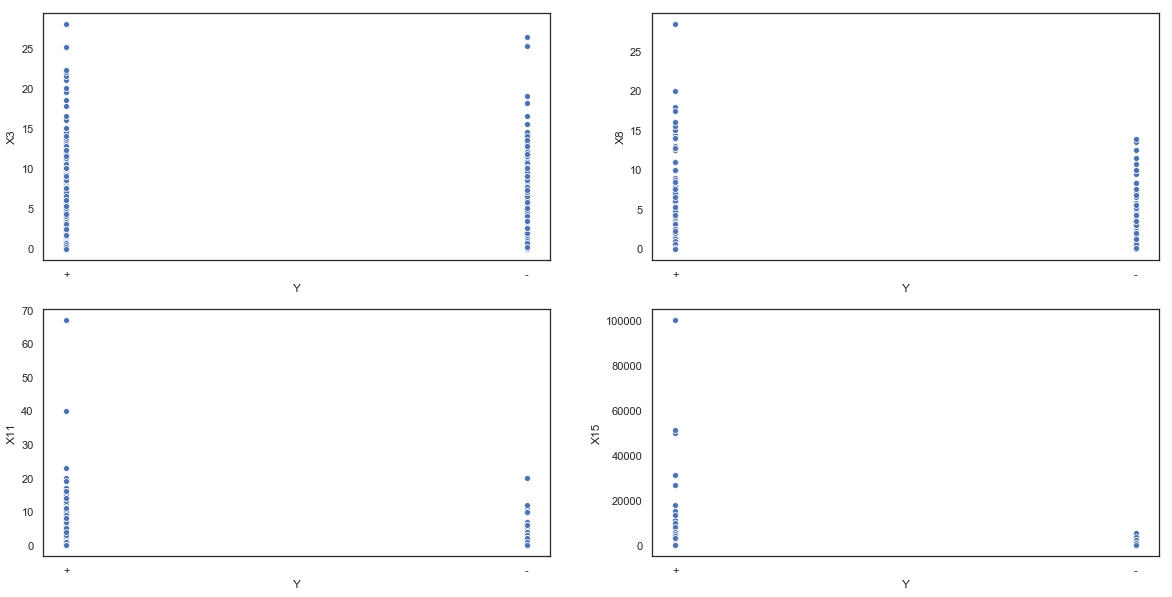

In [23]:
f,ax=plt.subplots(2,2,figsize=(20,10))

sns.scatterplot(x='Y', y='X3', data=df, ax=ax[0][0])
sns.scatterplot(x='Y', y='X8', data=df, ax=ax[0][1])
sns.scatterplot(x='Y', y='X11', data=df, ax=ax[1][0])
sns.scatterplot(x='Y', y='X15', data=df, ax=ax[1][1])

plt.show()

## Z-Score

In [24]:
from scipy import stats

z = np.abs(stats.zscore(df[continous_columns]))
print(z)

[[0.06143521 0.24360624 0.73991963 0.08807405]
 [0.85743812 0.2166025  0.4939762  0.03740186]
 [0.64838685 0.4557804  0.53427033 0.1949847 ]
 ...
 [1.75570273 0.06718407 0.28832689 0.19536858]
 [0.91673631 0.65290429 0.4939762  0.05160543]
 [0.27953197 1.81249968 0.4939762  0.19556052]]


In [25]:
threshold = 10
print(np.where(z > threshold))

(array([120, 316], dtype=int64), array([2, 3], dtype=int64))


In [26]:
df_o = df.copy()
df_o.shape

(689, 16)

In [27]:
df_o = df_o[(z < threshold).all(axis=1)]
df_o.shape

(687, 16)

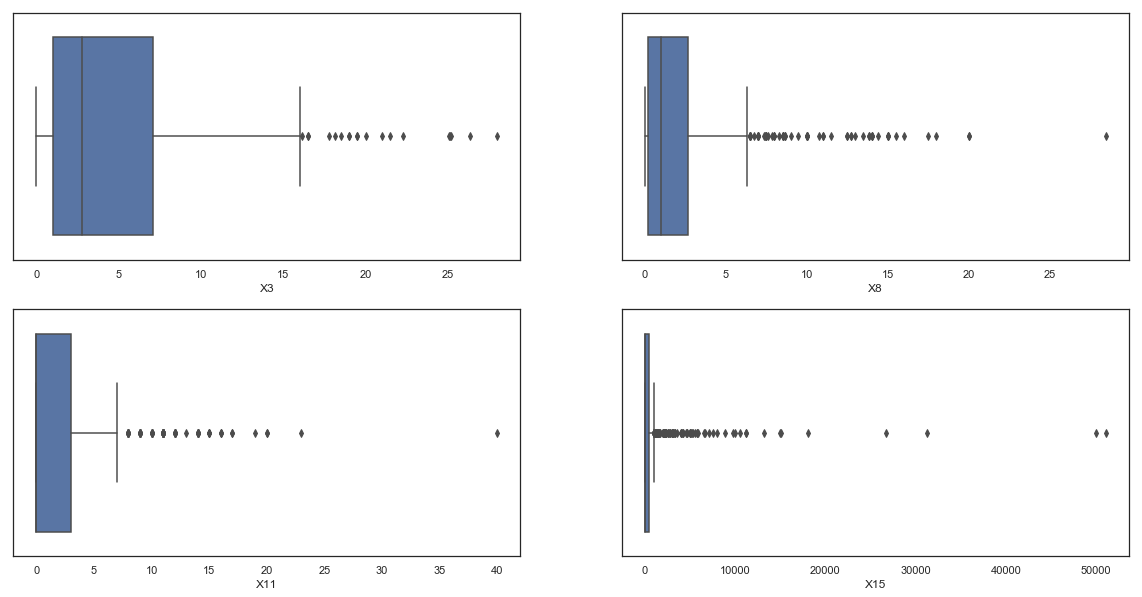

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,10))

sns.boxplot(x=df_o['X3'], ax=ax[0][0])
sns.boxplot(x=df_o['X8'], ax=ax[0][1])
sns.boxplot(x=df_o['X11'], ax=ax[1][0])
sns.boxplot(x=df_o['X15'], ax=ax[1][1])

plt.show()

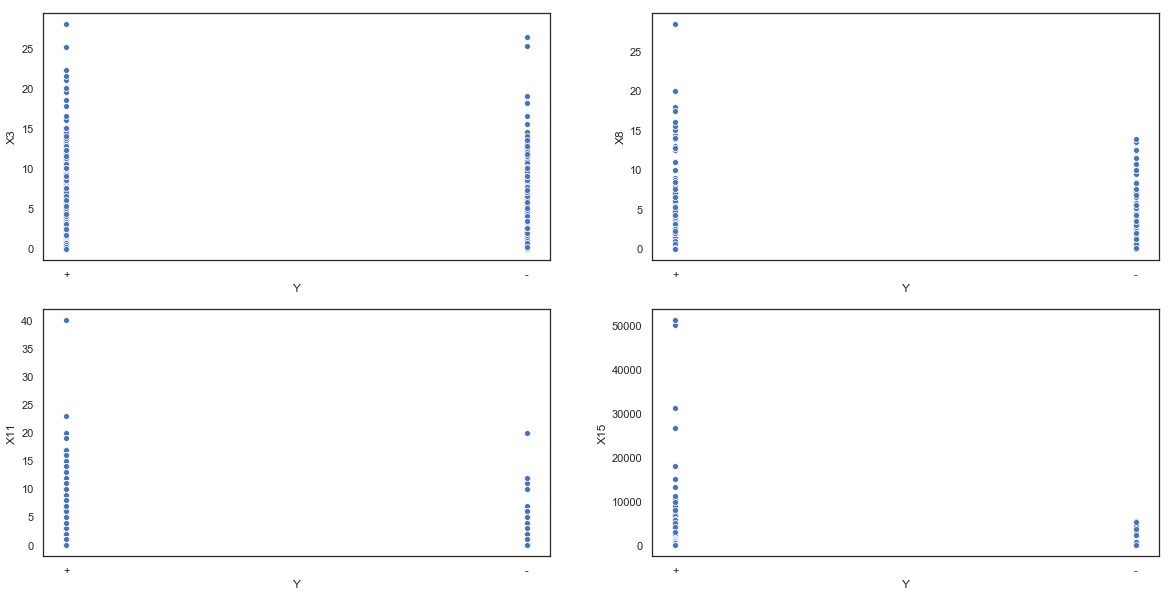

In [29]:
f,ax=plt.subplots(2,2,figsize=(20,10))

sns.scatterplot(x='Y', y='X3', data=df_o, ax=ax[0][0])
sns.scatterplot(x='Y', y='X8', data=df_o, ax=ax[0][1])
sns.scatterplot(x='Y', y='X11', data=df_o, ax=ax[1][0])
sns.scatterplot(x='Y', y='X15', data=df_o, ax=ax[1][1])

plt.show()

In [30]:
df_o.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+


In [31]:
df = df[(z < threshold).all(axis=1)]
df.shape

(687, 16)

# Feature Engineering

## Preprocesamiento de datos

### Label Encoding

Procesar columnas, aplicar LabelEncoder a atributos categoricos, de esta manera todos los atributos categoricos se codifican a valores numericos para que puedan ser trabajados por el modelo de regresion logistica.

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df:
    if df[col].dtypes == 'object':
        le.fit(df[col].unique())
        df[col] = le.transform(df[col])

print(df.info())        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 688
Data columns (total 16 columns):
X1     687 non-null int32
X2     687 non-null int32
X3     687 non-null float64
X4     687 non-null int32
X5     687 non-null int32
X6     687 non-null int32
X7     687 non-null int32
X8     687 non-null float64
X9     687 non-null int32
X10    687 non-null int32
X11    687 non-null int64
X12    687 non-null int32
X13    687 non-null int32
X14    687 non-null int32
X15    687 non-null int64
Y      687 non-null int32
dtypes: float64(2), int32(12), int64(2)
memory usage: 59.0 KB
None


# Selección del modelo, entrenamiento y evaluación

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

X=df.drop('Y',axis=1)
y=df['Y']


# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('logistic', LogisticRegression())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
parameters = {'logistic__C': c_space, 'logistic__penalty': ['l1', 'l2']}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8623188405797102
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        62
           1       0.93      0.82      0.87        76

   micro avg       0.86      0.86      0.86       138
   macro avg       0.86      0.87      0.86       138
weighted avg       0.87      0.86      0.86       138

Tuned Model Parameters: {'logistic__C': 0.05179474679231213, 'logistic__penalty': 'l1'}


## Support Vector Machine

In [34]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[0.001, 0.01, 0.1, 1, 10],
              'SVM__gamma':[0.1, 0.01, 1]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        62
           1       0.88      0.88      0.88        76

   micro avg       0.87      0.87      0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138

Tuned Model Parameters: {'SVM__C': 0.1, 'SVM__gamma': 0.1}


# Feature Selection

## Correlation Matrix with Heatmap

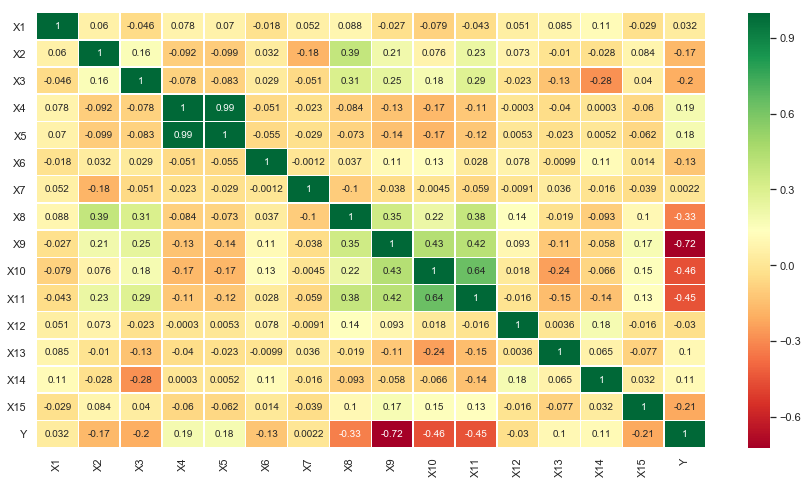

In [35]:
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

## Univariate Selection

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:15]
y = df.iloc[:,-1]


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

   Specs      Score
14   X15 453289.978
1     X2   1183.310
10   X11   1056.388
7     X8    366.481
13   X14    287.758
8     X9    171.220
2     X3    144.751
9    X10     82.766
5     X6     37.588
4     X5     35.745
12   X13     12.795
3     X4      3.660
11   X12      0.330
0     X1      0.219
6     X7      0.004


## Feature Importance

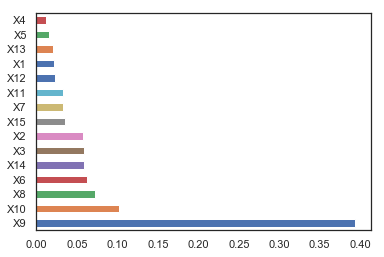

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Evaluación del modelo Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df.drop(['Y', 'X4', 'X5', 'X1'],axis=1)
y=df['Y']

logreg = LogisticRegression()

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('logistic', logreg)]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
parameters = {'logistic__C': c_space, 'logistic__penalty': ['l1', 'l2']}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cvl = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cvl.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cvl.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cvl.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cvl.best_params_))

Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        62
           1       0.87      0.89      0.88        76

   micro avg       0.87      0.87      0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138

Tuned Model Parameters: {'logistic__C': 0.006105402296585327, 'logistic__penalty': 'l2'}


# Evaluación del modelo Support Vector Machine

In [39]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X=df.drop(['Y', 'X4', 'X5', 'X1'],axis=1)
y=df['Y']

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[0.001, 0.01, 0.1, 1, 10],
              'SVM__gamma':[0.1, 0.01, 1]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8623188405797102
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        62
           1       0.93      0.82      0.87        76

   micro avg       0.86      0.86      0.86       138
   macro avg       0.86      0.87      0.86       138
weighted avg       0.87      0.86      0.86       138

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


# Exactitud y Precision

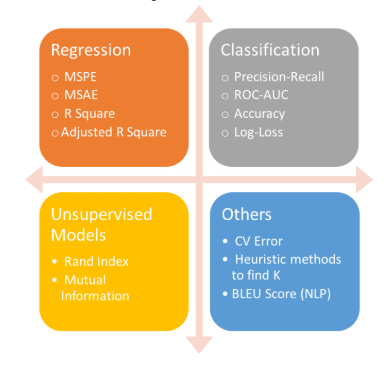

## Curva ROC

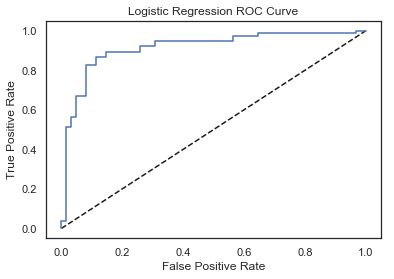

In [40]:
from sklearn.metrics import roc_curve

y_pred_prob = cvl.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

## Area under the ROC curve (AUC)

In [41]:
from sklearn.metrics import roc_auc_score 
    
roc_auc_score(y_test, y_pred_prob) 

0.9136247877758913

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(cv, X, y, cv=5, scoring='roc_auc') 

C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0.78858846, 0.98403236, 0.99105812, 0.84771355, 0.9497807 ])

## PACKAGES

In [43]:
import matplotlib
import sklearn
import scipy
import sys

print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.2
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
